Natalie LaLuzerne

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Constants

In [2]:
movie_path = r'..\Data\ml-latest-small\movies.csv'
ratings_path = r'..\Data\ml-latest-small\ratings.csv'
tags_path = r'..\Data\ml-latest-small\tags.csv'

Read in the data sets

In [3]:
movies = pd.read_csv( movie_path )
ratings = pd.read_csv( ratings_path )
tags = pd.read_csv( tags_path )

Remove title and genres columns from movies

In [4]:
movies = movies.drop( columns = [ 'title', 'genres' ] )

Calculate average rating for each movie and add new column to movies frame

In [5]:
avg_ratings = ratings.groupby( 'movieId' )[ 'rating' ].mean()
movies = pd.merge( movies, avg_ratings, on = 'movieId', how = 'left' )

Get tags for each movie and add the list of tags into a new column in the movies frame

In [6]:
movies[ 'tags' ] = np.nan
movies[ 'tags' ] = movies[ 'tags' ].astype( object )
for movie in movies.iterrows():
    df = tags.loc[ tags[ 'movieId' ] == movie[ 1 ].movieId ]
    df = df.drop_duplicates( subset = 'tag' )
    tags_list = df[ 'tag' ].tolist()
    tag_str = ''
    for tag in tags_list:
        tag_str = tag_str + str( tag ) + ' | '
    if( len( tags_list ) != 0 ):
        movies.at[ movie[ 0 ], 'tags' ] = tag_str[ : -3 ]

Drop rows which have no tags or no average ratings

In [7]:
movies = movies.dropna()

Use one hot encoding to represent movie tags

In [8]:
coded_tags = movies.tags.str.get_dummies()
movies = movies.drop( columns = [ 'tags' ] )
movies = movies.join( coded_tags )

Drop movieId column before performing K-means

In [9]:
movies = movies.drop( columns = [ 'movieId' ] )

Use the  K-means clustering model

In [10]:
kmeans = KMeans().fit( movies )
labels = kmeans.predict( movies )
centers = kmeans.cluster_centers_

Plot the K-means clustering

Text(0.5, 1.0, 'K-Means Clustering for Movie Recommendations')

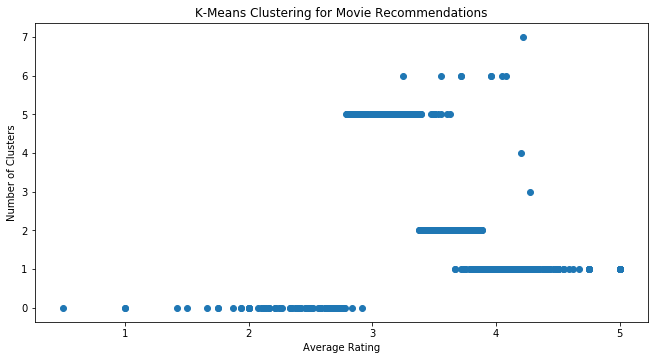

In [11]:
clusters = pd.DataFrame( labels )
plt.figure( figsize = [ 11, 5.5 ] )
plt.scatter( movies[ 'rating' ], clusters[ 0 ] )
plt.xlabel( "Average Rating" )
plt.ylabel( "Number of Clusters" )
plt.title( "K-Means Clustering for Movie Recommendations" )